# Level 3 – Task 3: Price Range vs Delivery & Booking Analysis

## 🔍 Objective:
Understand how `Price range` affects:
1. Whether a restaurant offers **online delivery**
2. Whether it provides **table booking**

## 🛠️ Approach:
- Clean and process `Price range`, `Has Online delivery`, and `Has Table booking`
- Group data by `Price range` to see service availability
- Visualize results with stacked bars or grouped plots

## 📈 Insight:
This task reveals how service models vary across budget levels — do premium restaurants avoid delivery? Are bookings more common at high-end places?

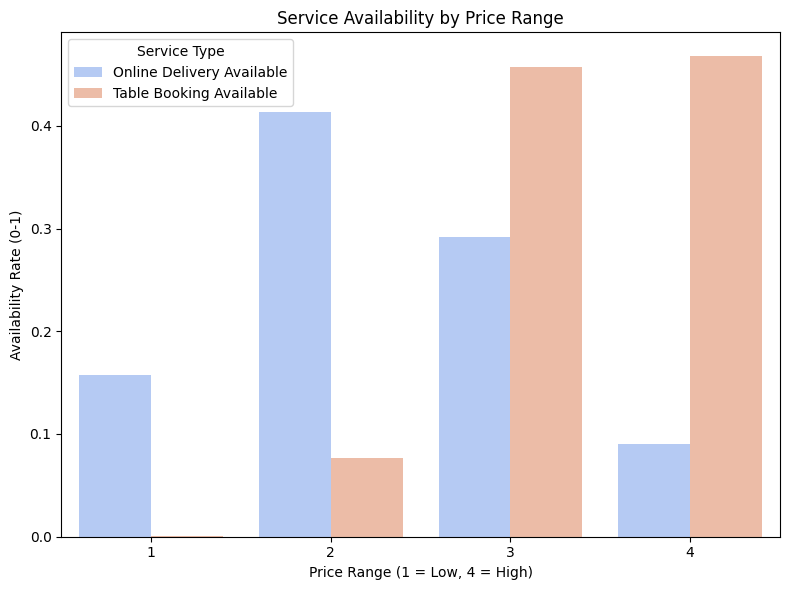

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../Dataset.csv")

# Clean relevant columns
df = df.dropna(subset=['Price range', 'Has Online delivery', 'Has Table booking'])
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')

# Normalize boolean-like columns
df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.lower()
df['Has Table booking'] = df['Has Table booking'].str.strip().str.lower()

# Convert to binary: Yes → 1, No → 0
df['Online Delivery Available'] = df['Has Online delivery'].map({'yes': 1, 'no': 0})
df['Table Booking Available'] = df['Has Table booking'].map({'yes': 1, 'no': 0})

# Group by Price Range
service_by_price = df.groupby('Price range')[['Online Delivery Available', 'Table Booking Available']].mean().reset_index()

# Melt for plotting
melted = pd.melt(service_by_price, id_vars='Price range',
                 var_name='Service Type', value_name='Availability Rate')

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=melted, x='Price range', y='Availability Rate', hue='Service Type', palette='coolwarm')
plt.title("Service Availability by Price Range")
plt.ylabel("Availability Rate (0-1)")
plt.xlabel("Price Range (1 = Low, 4 = High)")
plt.tight_layout()
plt.show()